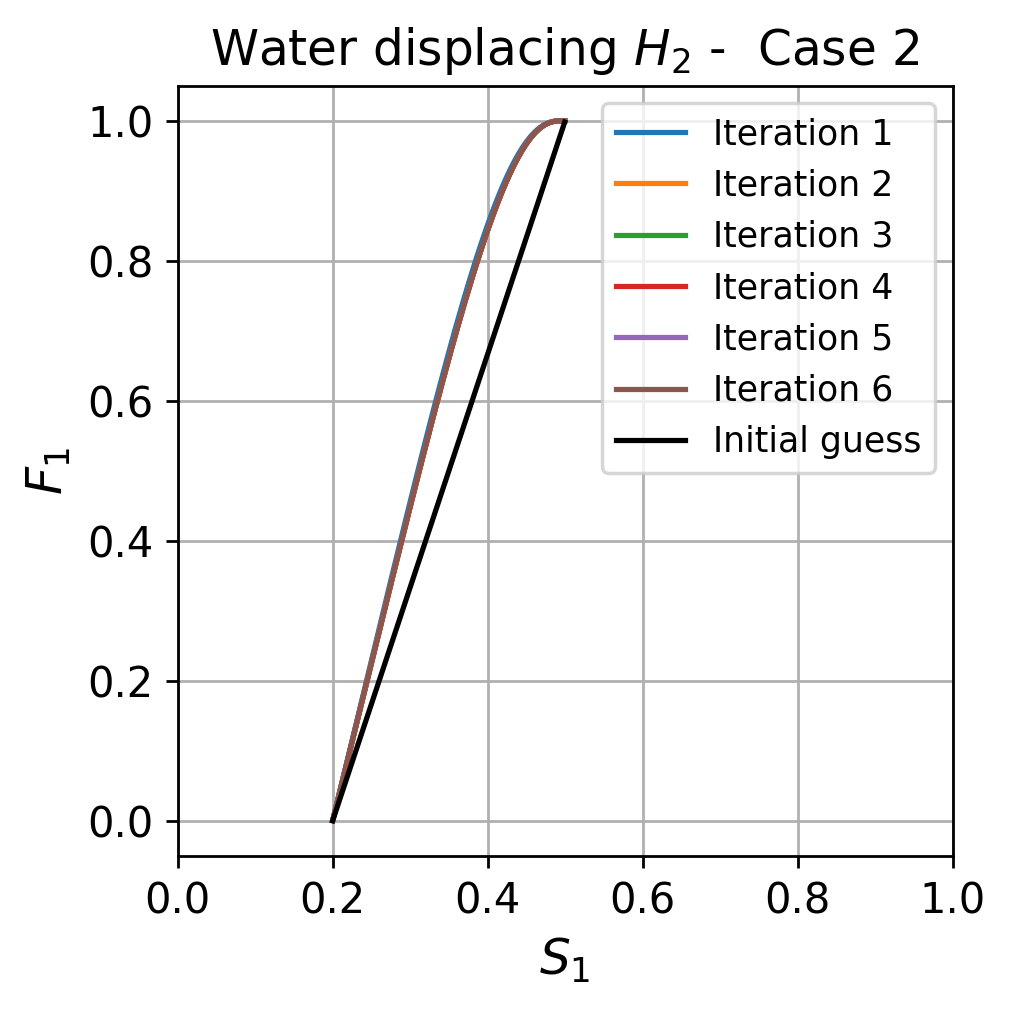

In [34]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d

# Define the constants again
phi = 0.25
S1i = 0.2
S1_star = 0.5

df_case2 = pd.read_csv('/home/ejt123/2024/CodingFluidFlow/diffusion_coefficient_case2.csv')

df_case2.sort_values('Saturation', inplace=True)

# Interpolate D(beta) as a function for later use in integration
D_interp = interp1d(df_case2['Saturation'], df_case2['Diffusion Coefficient'], kind='cubic', fill_value="extrapolate")

# Define the initial guess for F1
def F1_initial(S1):
    return (S1 - S1i) / (S1_star - S1i) if S1i < S1 < S1_star else (0 if S1 <= S1i else 1)

# Define the integrand for the C^2 calculation
def integrand_C2(beta, F1_func):
    return (beta - S1i) * D_interp(beta) / F1_func(beta)

# Define the integrand for the F1 calculation
def integrand_F1(beta, S1, F1_func):
    return (beta - S1) * D_interp(beta) / F1_func(beta)

# Define the calculation of C^2
def calculate_C2(F1_func):
    return (phi / 2) * quad(integrand_C2, S1i, S1_star, args=(F1_func))[0]

# Define the update of F1 using the calculated C^2
def update_F1(S1, C2, F1_func):
    if S1 <= S1i:
        return 0
    elif S1 >= S1_star:
        return 1
    else:
        integral_result, _ = quad(integrand_F1, S1, S1_star, args=(S1, F1_func))
        return 1 - ((phi / (2 * C2)) * integral_result)

C2 = calculate_C2(F1_initial)
# Iteration settings
tolerance = 1e-6
max_iterations = 10

# Initialize F1_func using the initial guess for F1
F1_func = F1_initial

# For plotting convergence
F1_iterations = []

# Perform the iteration
for iteration in range(max_iterations):
    # Update F1 across the range of S1
    F1_values = [update_F1(S1, C2, F1_func) for S1 in df_case2['Saturation']]
    
    # Save the F1 values for this iteration for plotting convergence later
    F1_iterations.append(F1_values)
    
    # Interpolate the new F1 values
    F1_func_new = interp1d(df_case2['Saturation'], F1_values, kind='cubic', bounds_error=False, fill_value="extrapolate")
    
    # Calculate new C2 value
    C2 = calculate_C2(F1_func_new)
    
    # Check for convergence in F1 (not C2)
    F1_changes = np.abs(np.array(F1_values) - np.array([F1_func(S1) for S1 in df_case2['Saturation']]))
    if np.all(F1_changes < tolerance):
        converged = True
        break
    
    # Update F1_func for next iteration
    F1_func = F1_func_new

# Check for convergence and return results
if not converged:
    raise ValueError("The iteration did not converge within the maximum number of iterations.")

# Plot how F_1 changes with each iteration
plt.figure(figsize=(4, 4), dpi=250)
for i, F1_iter in enumerate(F1_iterations):
    plt.plot(df_case2['Saturation'], F1_iter, label=f'Iteration {i+1}')
plt.plot(df_case2['Saturation'], (df_case2['Saturation'].values - S1i )/(S1_star - S1i), 'k', label='Initial guess')
plt.xlabel(r'$S_{1}$', fontsize=14)
plt.xlim(0, 1)
plt.ylabel(r'$F_{1}$', fontsize=14)
#Increase size of x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Water displacing $H_{2}$ -  Case 2', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Final converged C2 and F1 values
C_case2 = np.sqrt(C2)
F1_case2 = F1_func(df_case2['Saturation'])

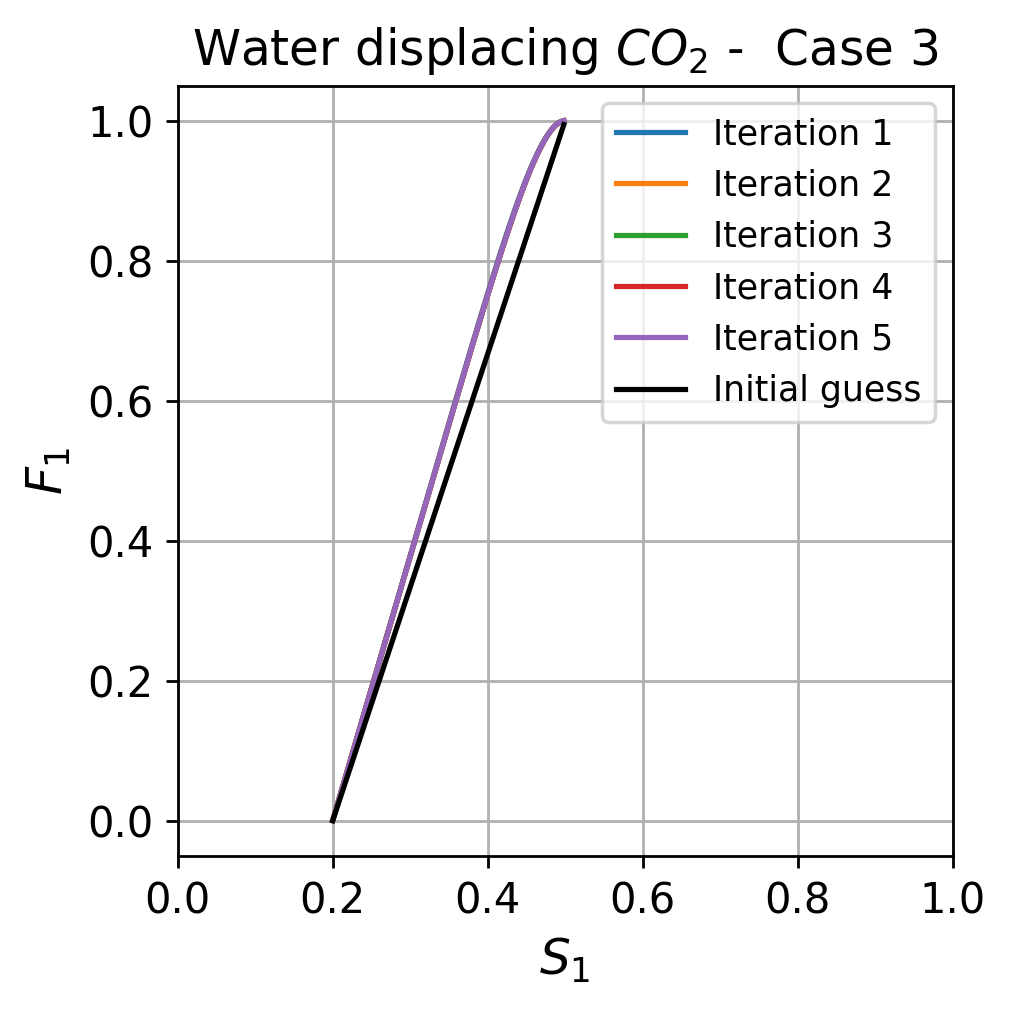

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d

# Define the constants again
phi = 0.25
S1i = 0.2
S1_star = 0.5

df_case3 = pd.read_csv('/home/ejt123/2024/CodingFluidFlow/diffusion_coefficient_case3.csv')

df_case3.sort_values('Saturation', inplace=True)

# Interpolate D(beta) as a function for later use in integration
D_interp = interp1d(df_case3['Saturation'], df_case3['Diffusion Coefficient'], kind='cubic', fill_value="extrapolate")

# Define the initial guess for F1
def F1_initial(S1):
    return (S1 - S1i) / (S1_star - S1i) if S1i < S1 < S1_star else (0 if S1 <= S1i else 1)

# Define the integrand for the C^2 calculation
def integrand_C2(beta, F1_func):
    return (beta - S1i) * D_interp(beta) / F1_func(beta)

# Define the integrand for the F1 calculation
def integrand_F1(beta, S1, F1_func):
    return (beta - S1) * D_interp(beta) / F1_func(beta)

# Define the calculation of C^2
def calculate_C2(F1_func):
    return phi / 2 * quad(integrand_C2, S1i, S1_star, args=(F1_func))[0]

# Define the update of F1 using the calculated C^2
def update_F1(S1, C2, F1_func):
    if S1 <= S1i:
        return 0
    elif S1 >= S1_star:
        return 1
    else:
        integral_result, _ = quad(integrand_F1, S1, S1_star, args=(S1, F1_func))
        return 1 - phi / (2 * C2) * integral_result

C2 = calculate_C2(F1_initial)
# Iteration settings
tolerance = 1e-6
max_iterations = 10

# Initialize F1_func using the initial guess for F1
F1_func = F1_initial

# For plotting convergence
F1_iterations = []

# Perform the iteration
for iteration in range(max_iterations):
    # Update F1 across the range of S1
    F1_values = [update_F1(S1, C2, F1_func) for S1 in df_case3['Saturation']]
    
    # Save the F1 values for this iteration for plotting convergence later
    F1_iterations.append(F1_values)
    
    # Interpolate the new F1 values
    F1_func_new = interp1d(df_case3['Saturation'], F1_values, kind='cubic', bounds_error=False, fill_value="extrapolate")
    
    # Calculate new C2 value
    C2 = calculate_C2(F1_func_new)
    
    # Check for convergence in F1 (not C2)
    F1_changes = np.abs(np.array(F1_values) - np.array([F1_func(S1) for S1 in df_case3['Saturation']]))
    if np.all(F1_changes < tolerance):
        converged = True
        break
    
    # Update F1_func for next iteration
    F1_func = F1_func_new

# Check for convergence and return results
if not converged:
    raise ValueError("The iteration did not converge within the maximum number of iterations.")

# Plot how F_1 changes with each iteration
plt.figure(figsize=(4, 4), dpi=250)
for i, F1_iter in enumerate(F1_iterations):
    plt.plot(df_case3['Saturation'], F1_iter, label=f'Iteration {i+1}')
plt.plot(df_case3['Saturation'], (df_case3['Saturation'].values - S1i )/(S1_star - S1i), 'k', label='Initial guess')
plt.xlabel(r'$S_{1}$', fontsize=14)
plt.xlim(0, 1)
plt.ylabel(r'$F_{1}$', fontsize=14)
#Increase size of x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Water displacing $CO_{2}$ -  Case 3', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Final converged C2 and F1 values
C_case3 = np.sqrt(C2)
F1_case3 = F1_func(df_case3['Saturation'])

In [4]:
C_case2, C_case3

(6.842258571252644e-05, 7.069562952024871e-06)

In [11]:
omega_3_2 = (2*C_case3/0.25)*np.gradient(F1_case3, df_case3['Saturation'])

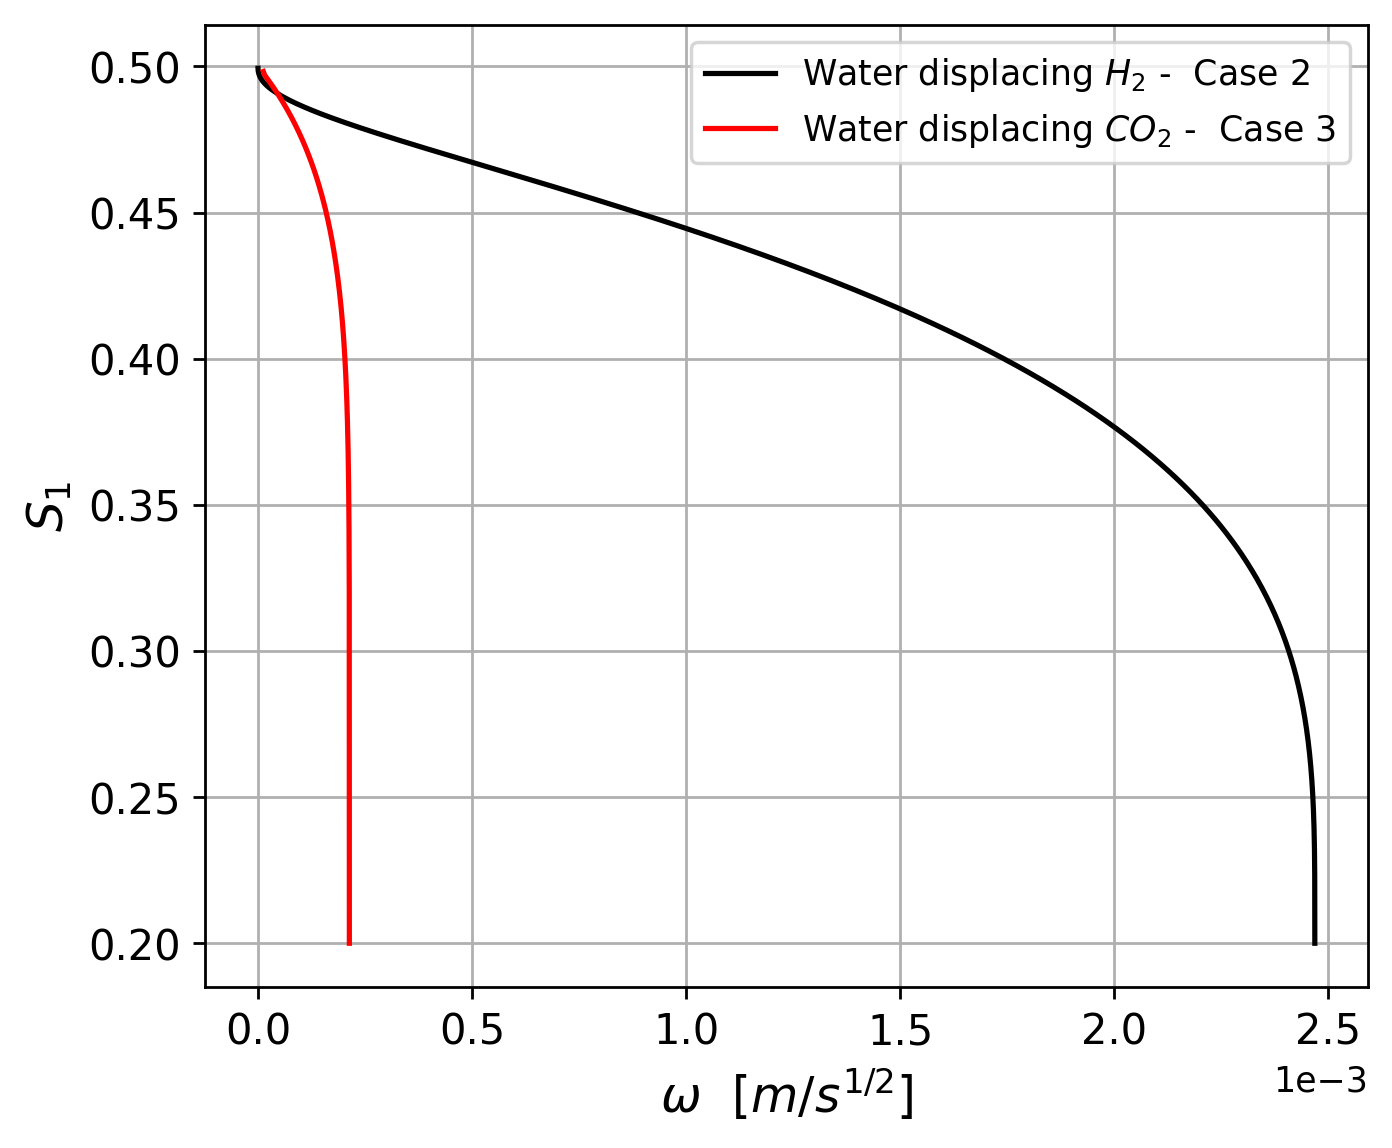

In [36]:
#plot F1 and omega
plt.figure(figsize=(6, 5), dpi=250)

plt.plot(omega_2_2, df_case2['Saturation'], label=r'Water displacing $H_{2}$ -  Case 2', color='k')
plt.plot(omega_3_2, df_case3['Saturation'], label=r'Water displacing $CO_{2}$ -  Case 3', color='red')
#plt.title(r'Water displacing $H_{2}$ -  Case 2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\omega$  $[m/s^{1/2}]$', fontsize=14)
plt.ylabel(r'$S_{1}$', fontsize=14)
#scientific x axis
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()

In [7]:
omega_2_v2 = (2*C_case2/0.25)*np.gradient(F1_case2, df_case2['Saturation'])

In [9]:
#export omega and saturation values to csv

df_imbibition_analytical_case2 = pd.DataFrame({'omega_2': omega_2, 'Saturation': df_case2['Saturation'][:-1]})
df_imbibition_analytical_case2.to_csv('/home/ejt123/2024/CodingFluidFlow/Imbibition_analytical_case2.csv', index=False)

df_imbibition_analytical_case3 = pd.DataFrame({'omega_3': omega_3, 'Saturation': df_case3['Saturation'][:-1]})
df_imbibition_analytical_case3.to_csv('/home/ejt123/2024/CodingFluidFlow/Imbibition_analytical_case3.csv', index=False)


NameError: name 'omega_2' is not defined